In [1]:
!conda install scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
#from scipy.optimize import fsolve
#from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

AttributeError: module 'matplotlib.mathtext' has no attribute 'rcParams'

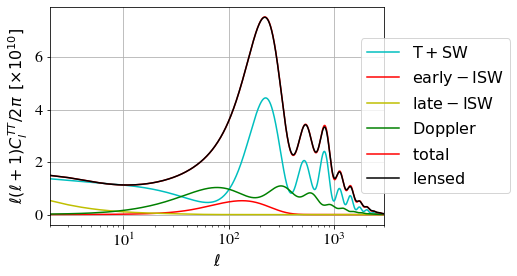

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':5000}
###############
#    
# call CLASS 
#
M = Class()
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()  # clean output
M.empty()           # clean input
#
M.set(common_settings) # new input
M.set({'temperature contributions':'tsw'}) 
M.compute()
cl_tsw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'eisw'})
M.compute()
cl_eisw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'lisw'})
M.compute()
cl_lisw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'dop'})
M.compute()
cl_dop = M.raw_cl(3000) 
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [4]:
plt.savefig('cltt_terms.pdf',bbox_inches='tight')

<Figure size 576x432 with 0 Axes>

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26152
aquí voy y todo bien 2.75112
aquí voy y todo bien 2.00632
aquí voy y todo bien 2.08084
aquí voy y todo bien 2.04358
aquí voy y todo bien 2.0801
aquí voy y todo bien 2.06184
aquí voy y todo bien 2.0801
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26152
aquí voy y todo bien 2.75112
aquí voy y todo bien 2.00632
aquí voy y todo bien 2.08084
aquí voy y todo bien 2.04358
aquí voy y todo bien 2.0801
aquí voy y todo bien 2.06184
aquí voy y todo bien 2.0801
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26152
aquí voy y todo bien 2.75112
aquí voy y todo bien 2.00632
aquí voy y todo bien 2.08084
aquí voy y todo bien 2.04358
aquí voy y todo bien 2.0801
aquí voy y todo bien 2.06184
aquí voy y todo bien 2.0801
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26152
aquí voy y todo bien 2.75112
aquí voy y todo bien 2.00632
aquí voy y todo bien 2.08084
aquí voy y

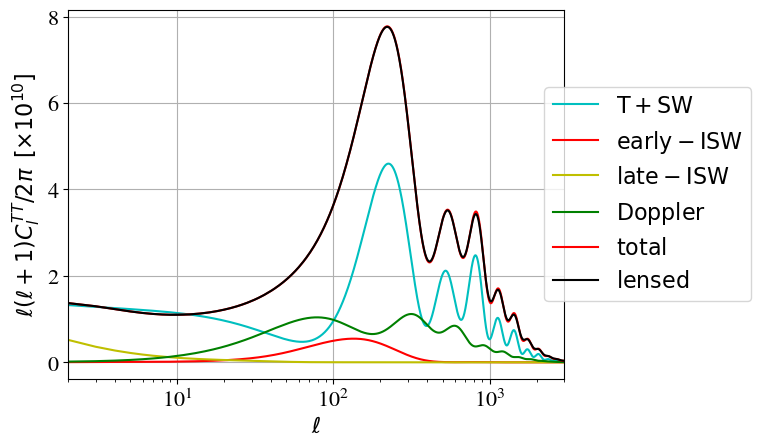

In [6]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
k_out=[0.1]
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'gravity_model':'quintessence_monomial',
                   'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_Lambda': 0.689,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'omega_b':0.02238280,
                   'Omega_cdm':0,
                   'x0_schm':1e-3,
                   'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':10,
                   'lambda_schm':10,
                    #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'lensing':'yes',
                    'l_max_scalars':5000
                    }
#    
# call CLASS 
#
m = Class()
m.set(common_settings)
m.compute()
cl_tot = m.raw_cl(3000)
cl_lensed = m.lensed_cl(3000)
m.struct_cleanup()  # clean output
m.empty()           # clean input
#
m.set(common_settings) # new input
m.set({'temperature contributions':'tsw'}) 
m.compute()
cl_tsw = m.raw_cl(3000) 
m.struct_cleanup()
m.empty()
#
m.set(common_settings)
m.set({'temperature contributions':'eisw'})
m.compute()
cl_eisw = m.raw_cl(3000) 
m.struct_cleanup()
m.empty()
#
m.set(common_settings)
m.set({'temperature contributions':'lisw'})
m.compute()
cl_lisw = m.raw_cl(3000) 
m.struct_cleanup()
m.empty()
#
m.set(common_settings)
m.set({'temperature contributions':'dop'})
m.compute()
cl_dop = m.raw_cl(3000) 
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))